In [65]:
import os 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as pd 
import numpy as np 
import random
import warnings 
warnings.filterwarnings('ignore')
import cv2
import rlcompleter,readline
readline.parse_and_bind('tab:complete')

In [2]:
Normal = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/NORMAL')
Pneumonia = os.listdir('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA')

In [3]:
filename = []
category = []
for label1 in Normal: 
    categories = label1.split('.')[0]
    
    filename.append(categories)
    category.append(2)


In [4]:
categories

'NORMAL2-IM-1423-0001'

In [54]:
Normal_df = pd.DataFrame({ 
    'filename':Normal,
    'category':category
})

In [55]:
Normal_df

,filename,category
0,IM-0115-0001.jpeg,2
1,IM-0117-0001.jpeg,2
2,IM-0119-0001.jpeg,2
3,IM-0122-0001.jpeg,2
4,IM-0125-0001.jpeg,2
...,...,...
1336,NORMAL2-IM-1406-0001.jpeg,2
1337,NORMAL2-IM-1412-0001.jpeg,2
1338,NORMAL2-IM-1419-0001.jpeg,2
1339,NORMAL2-IM-1422-0001.jpeg,2


In [7]:
categories2 = []
filename = []
for label2 in Pneumonia: 
    category2 = label2.split('.')[0]
    filename.append(category2)
    a2 = category2.split('_')
    if a2[1] == 'bacteria': 
        categories2.append(1)
    else: 
        categories2.append(0)


In [8]:
category2

'person9_bacteria_41'

In [9]:
a2

['person9', 'bacteria', '41']

In [34]:
Pneumonia_df = pd.DataFrame({ 

    'filename': Pneumonia,
    'category': categories2})

In [36]:
Pneumonia_df

,filename,category
0,person1000_bacteria_2931.jpeg,1
1,person1000_virus_1681.jpeg,0
2,person1001_bacteria_2932.jpeg,1
3,person1002_bacteria_2933.jpeg,1
4,person1003_bacteria_2934.jpeg,1
...,...,...
3870,person99_virus_183.jpeg,0
3871,person9_bacteria_38.jpeg,1
3872,person9_bacteria_39.jpeg,1
3873,person9_bacteria_40.jpeg,1


In [37]:
Pneumonia_df['category'] = Pneumonia_df['category'].replace({1:'bacteria',0:'virus'})

In [38]:
Pneumonia_df

,filename,category
0,person1000_bacteria_2931.jpeg,bacteria
1,person1000_virus_1681.jpeg,virus
2,person1001_bacteria_2932.jpeg,bacteria
3,person1002_bacteria_2933.jpeg,bacteria
4,person1003_bacteria_2934.jpeg,bacteria
...,...,...
3870,person99_virus_183.jpeg,virus
3871,person9_bacteria_38.jpeg,bacteria
3872,person9_bacteria_39.jpeg,bacteria
3873,person9_bacteria_40.jpeg,bacteria


In [39]:
import cv2
import random 
import numpy as np 
from keras.preprocessing.image import ImageDataGenerator,load_img 

# Normal lung example (Healthy People)

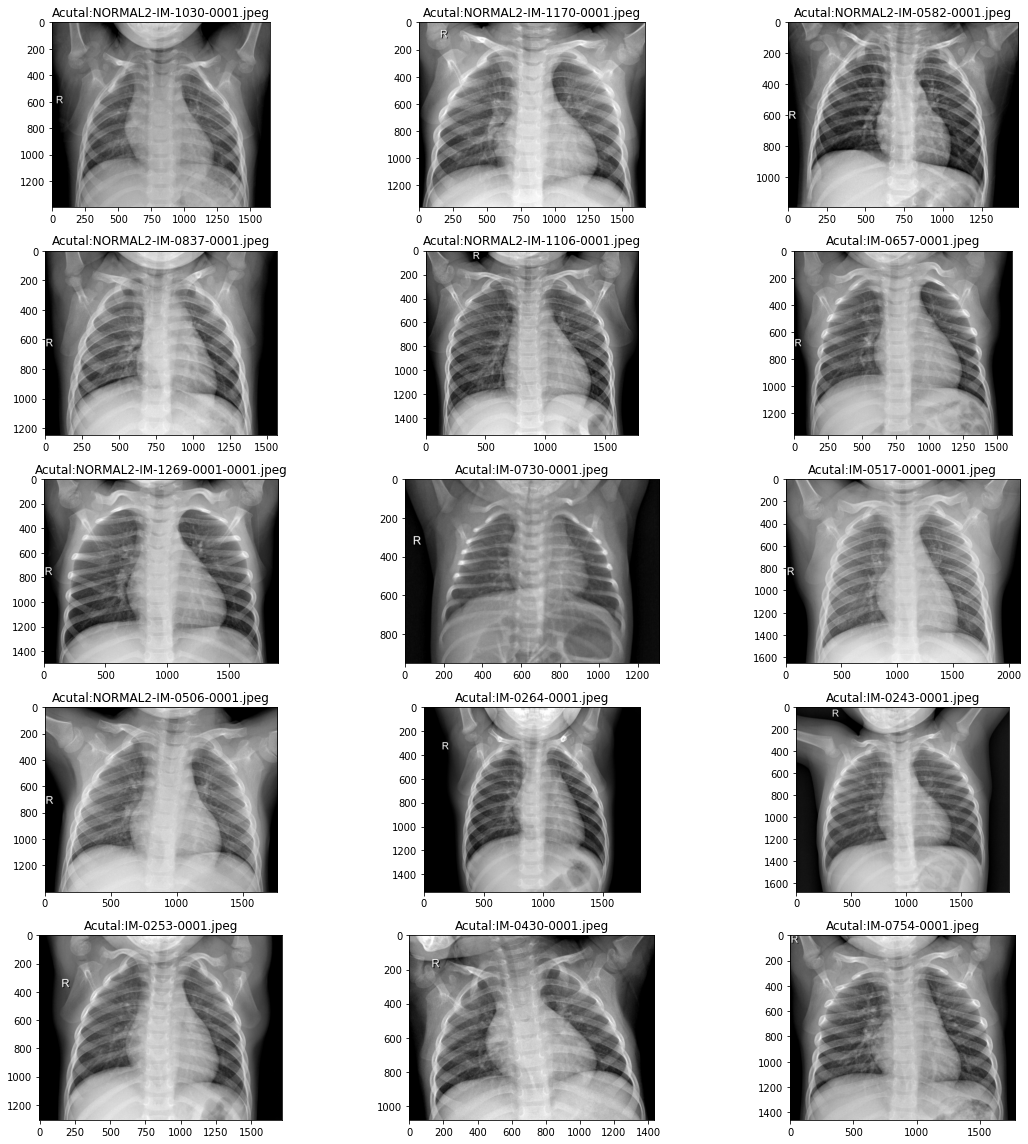

In [40]:
fig,ax = plt.subplots(5,3)
fig.set_size_inches(16,16)

    
for i in range(0,15):
    plt.subplot(5,3,i+1)
    sample = random.choice(Normal)
    img = load_img('C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/NORMAL/'+ sample)
    plt.title("Acutal:" + sample)
    plt.imshow(img)
plt.tight_layout()

In [56]:
new_Frame = pd.concat([Pneumonia_df,Normal_df])

In [57]:
new_Frame = new_Frame.reset_index(drop=True)

In [59]:
new_Frame['category'] = new_Frame['category'].replace({2:'normal'})

In [61]:
from sklearn.model_selection import train_test_split

train_df , validation_df = train_test_split(new_Frame,test_size=0.2,random_state=41)

In [62]:
train_df = train_df.reset_index(drop=True)
validation_df = validation_df.reset_index(drop=True)

In [63]:
train_df

,filename,category
0,NORMAL2-IM-0948-0001.jpeg,normal
1,person337_bacteria_1558.jpeg,bacteria
2,person281_bacteria_1329.jpeg,bacteria
3,person1351_virus_2330.jpeg,virus
4,person474_virus_971.jpeg,virus
...,...,...
4167,NORMAL2-IM-1357-0001.jpeg,normal
4168,IM-0384-0001.jpeg,normal
4169,IM-0279-0001.jpeg,normal
4170,person1442_bacteria_3726.jpeg,bacteria


In [71]:
train_generator = ImageDataGenerator( 

    shear_range=0.2,
    horizontal_flip=True, 
    width_shift_range=0.2,
    height_shift_range=0.2,
    rescale=1./255,
    zoom_range=0.3
)

train_datagenerator = train_generator.flow_from_dataframe( 

    train_df, 
    'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
    x_col='filename',
    y_col='category',
    target_size=(224,224),
    class_mode='categorical',
    batch_size=64,
    shuffle=True
)

Found 3107 validated image filenames belonging to 2 classes.


In [72]:
validation_datagen = ImageDataGenerator(rescale=1./255)

validation_datagenerator = validation_datagen.flow_from_dataframe( 

        validation_df ,
        'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
        x_col= 'filename',
        y_col= 'category',
        target_size=(128,128),
        class_mode='categorical',
        batch_size=64,
        shuffle=True
    
    )

Found 768 validated image filenames belonging to 2 classes.


In [73]:
example_df = train_df.sample(n=1)

example_generator = train_generator.flow_from_dataframe( 
 
    example_df, 
    'C:/Users/Lee Jong Ann/Desktop/dataset/Pneumonia/chest_xray/train/PNEUMONIA',
    x_col = 'filename',
    y_col = 'category',
    target_size = (224,244),
    class_mode = 'categorical'
    )

Found 1 validated image filenames belonging to 1 classes.


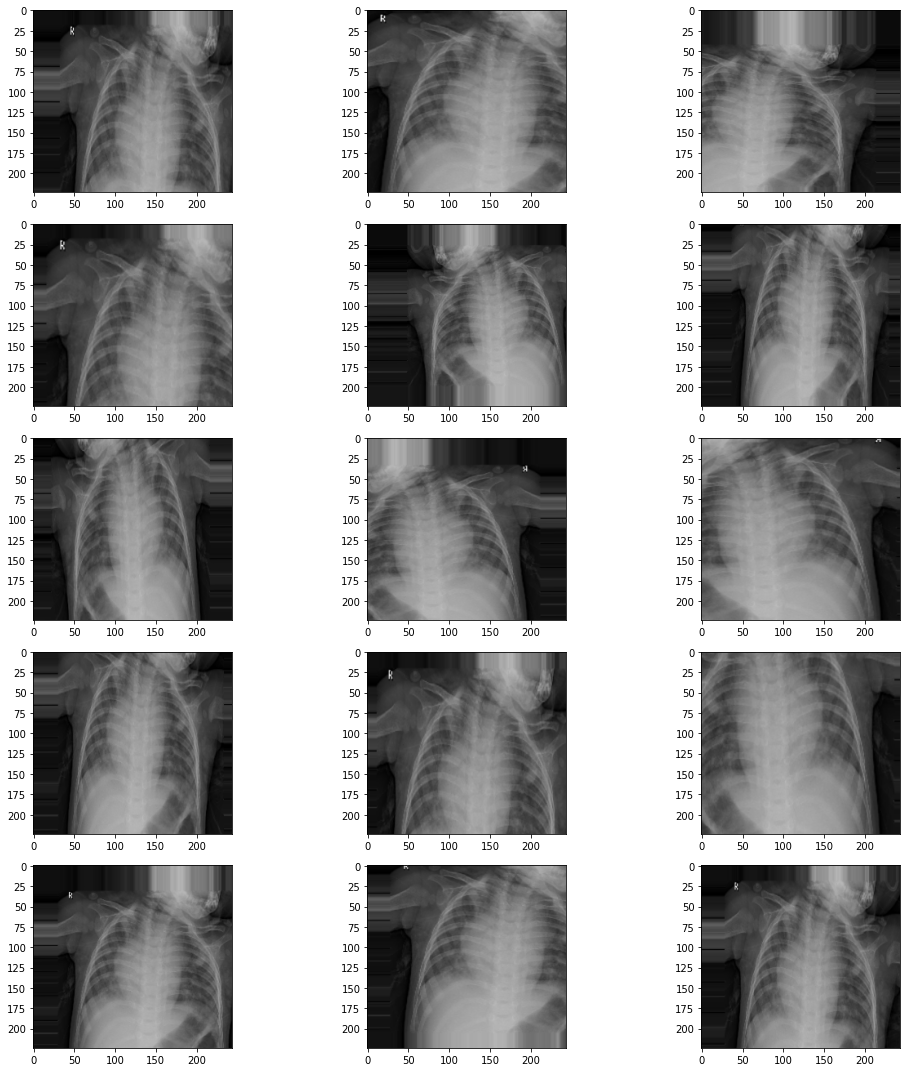

In [74]:
plt.figure(figsize=(15,15))

for i in range(0,15): 
    
    plt.subplot(5,3,i+1)
    for X_batch,Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
        
plt.tight_layout()
plt.show()

In [75]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,BatchNormalization ,Flatten
from keras.models import load_model,Sequential 

models = Sequential()

models.add(Conv2D(32,(2,2),activation='relu',input_shape=(224,224,3)))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))


models.add(Conv2D(64,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Conv2D(128,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Conv2D(256,(2,2),activation='relu'))
models.add(BatchNormalization())
models.add(MaxPooling2D(pool_size=(2,2)))
models.add(Dropout(0.25))

models.add(Flatten())
models.add(Dense(512,activation='relu'))
models.add(BatchNormalization())
models.add(Dense(2,activation='sigmoid'))
models.add(Dropout(0.25))

models.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
models.summary()



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
batch_normalization_11 (Batc (None, 223, 223, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 64)      8256      
_________________________________________________________________
batch_normalization_12 (Batc (None, 110, 110, 64)      256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 64)       

In [81]:
total_shape = train_df.shape[0]//batch_size
total_shape

65

In [82]:
from keras.callbacks import ReduceLROnPlateau
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=3,verbose=1,factor=0.3,min_lr=0.01)

In [ ]:
pred = models.fit_generator(
    train_datagenerator,
    steps_per_epoch=total_shape,
    epochs=5,
    verbose=1,
    callbacks=[learning_rate_reduction],
    validation_data=validation_datagenerator,
    validation_steps=total_shape,
    shuffle=True,
)